In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
import re
import warnings
warnings.filterwarnings("ignore")

In [142]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\final_teen_mental_health_chatbot_dataset (1).csv")

# Data Info

In [143]:
# Basic Data Overview
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Dataset Shape: (287, 2)

Missing Values:
 user_input      0
bot_response    0
dtype: int64

Data Types:
 user_input      object
bot_response    object
dtype: object


In [144]:
df.shape

(287, 2)

In [145]:
df.head()

,user_input,bot_response
0,I feel really sad today,I'm so sorry to hear that. Can you share what’...
1,I’m stressed about exams,That sounds overwhelming. Let’s talk about wha...
2,I feel anxious,I hear you. It’s okay to feel anxious sometime...
3,My friends don’t talk to me anymore,That must hurt. I'm here for you. Want to talk...
4,I’m so tired of everything,I'm really sorry you're feeling this way. You'...


In [146]:
df["bot_response"].value_counts()

bot_response
Notebooks are sweet! What’s it for?                                                                   1
I'm so sorry to hear that. Can you share what’s been going on?                                        1
That sounds overwhelming. Let’s talk about what’s stressing you out.                                  1
I hear you. It’s okay to feel anxious sometimes. Want to tell me more?                                1
That must hurt. I'm here for you. Want to talk about what happened?                                   1
                                                                                                     ..
That’s something a lot of people struggle with. But you’re unique, and your journey is valid.         1
Crying can be a way to release emotions. I’m here with you—want to talk about what’s causing this?    1
That could be anxiety. Have you been feeling stressed or overwhelmed lately?                          1
That’s a painful feeling. But I see you, and I’m he

# EDA,Visualization & Machine Learning

In [147]:
df.columns

Index(['user_input', 'bot_response'], dtype='object')

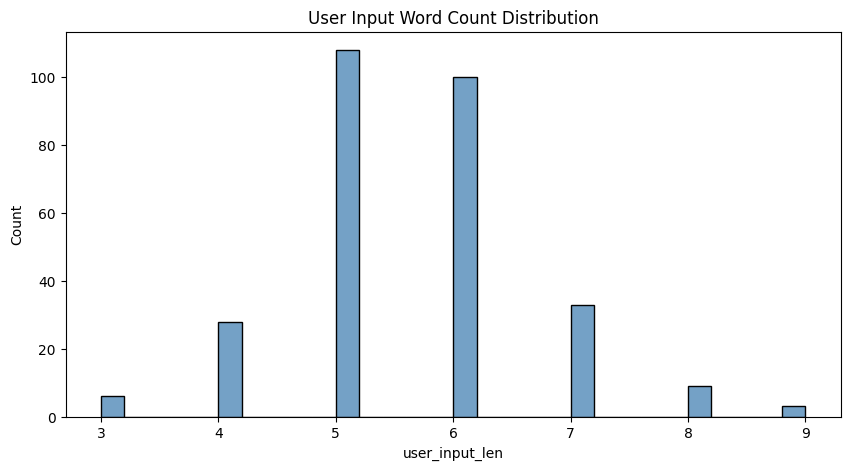

In [148]:
df['user_input_len'] = df['user_input'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,5))
sns.histplot(df['user_input_len'], bins=30, color="steelblue")
plt.title("User Input Word Count Distribution")
plt.show()

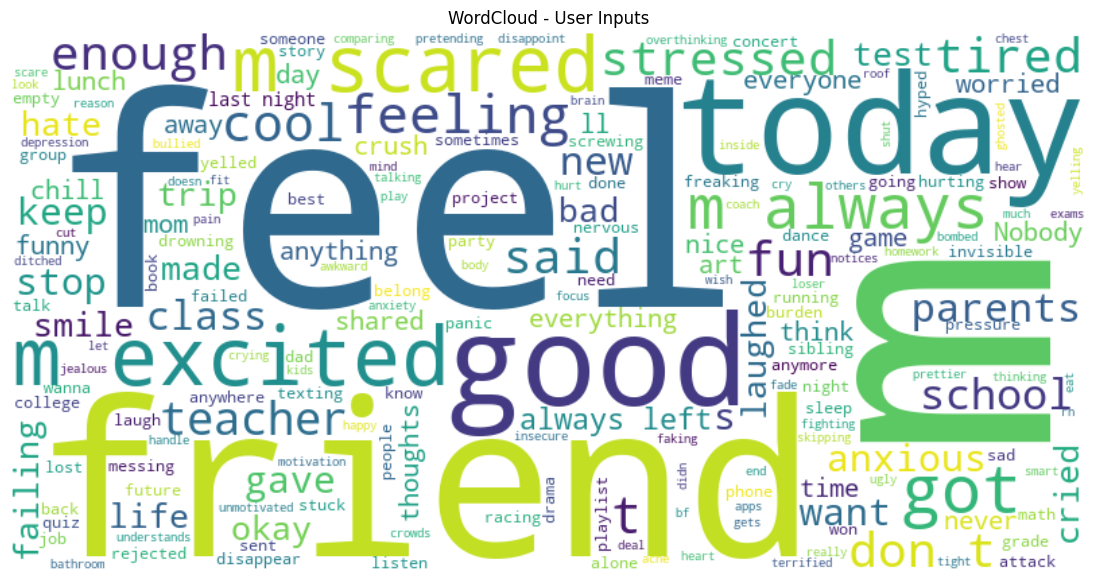

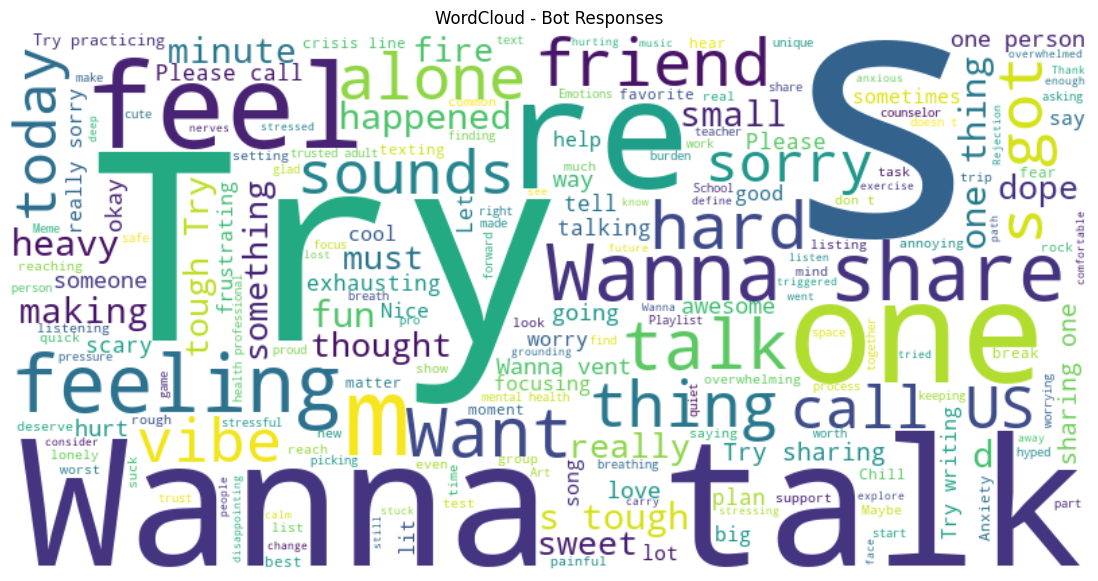

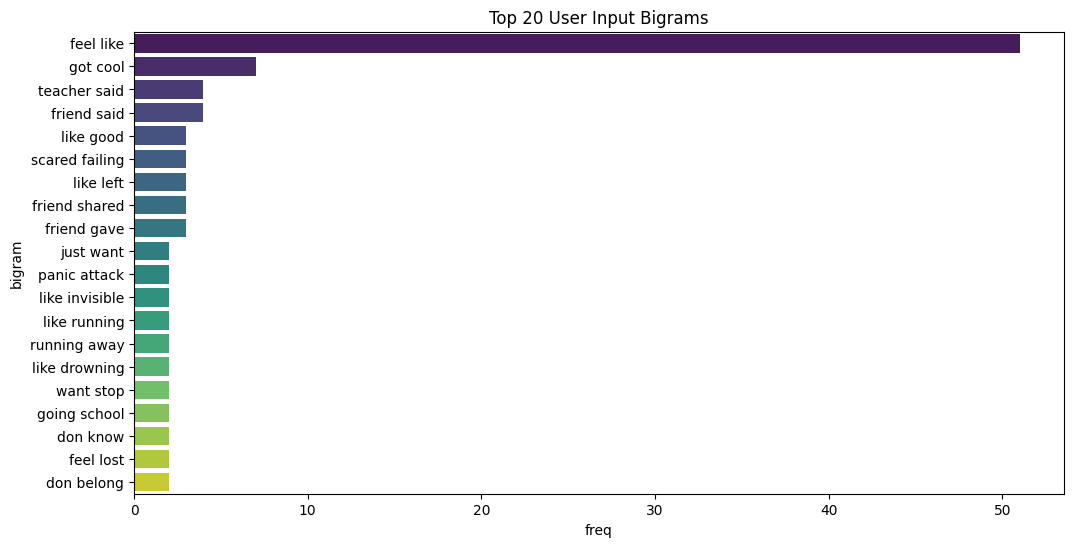

In [149]:
# Word clouds
wc_user = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['user_input'].astype(str)))
plt.figure(figsize=(15,7))
plt.imshow(wc_user, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - User Inputs")
plt.show()

wc_bot = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['bot_response'].astype(str)))
plt.figure(figsize=(15,7))
plt.imshow(wc_bot, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Bot Responses")
plt.show()

# Frequent user n-grams
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2), stop_words='english')
ngrams = cv.fit_transform(df['user_input'])
sum_words = ngrams.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
top_ngrams = pd.DataFrame(words_freq[:20], columns=["bigram","freq"])
plt.figure(figsize=(12,6))
sns.barplot(data=top_ngrams, x="freq", y="bigram", palette="viridis")
plt.title("Top 20 User Input Bigrams")
plt.show()

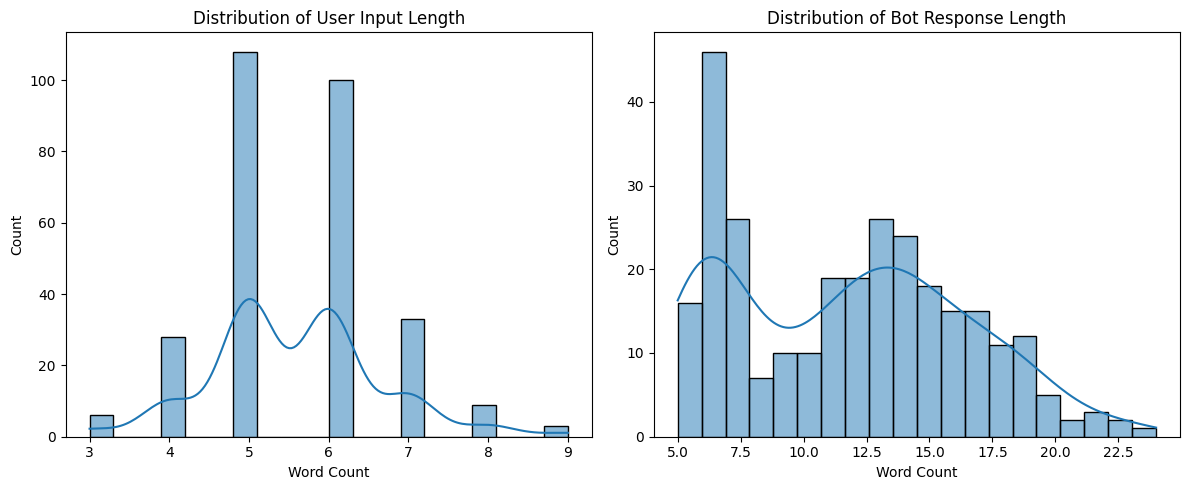

In [150]:
# Text Length Analysis
df['user_input_length'] = df['user_input'].apply(lambda x: len(x.split()))
df['bot_response_length'] = df['bot_response'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['user_input_length'], bins=20, kde=True)
plt.title('Distribution of User Input Length')
plt.xlabel('Word Count')
plt.subplot(1, 2, 2)
sns.histplot(df['bot_response_length'], bins=20, kde=True)
plt.title('Distribution of Bot Response Length')
plt.xlabel('Word Count')
plt.tight_layout()
plt.show()

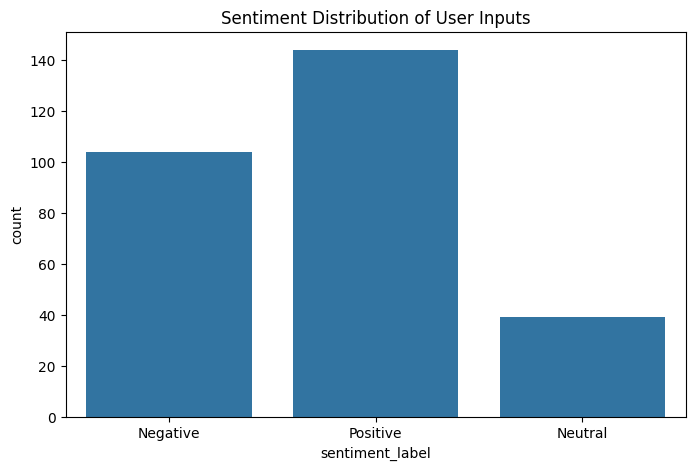

In [151]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['user_input'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Distribution of User Inputs')
plt.show()


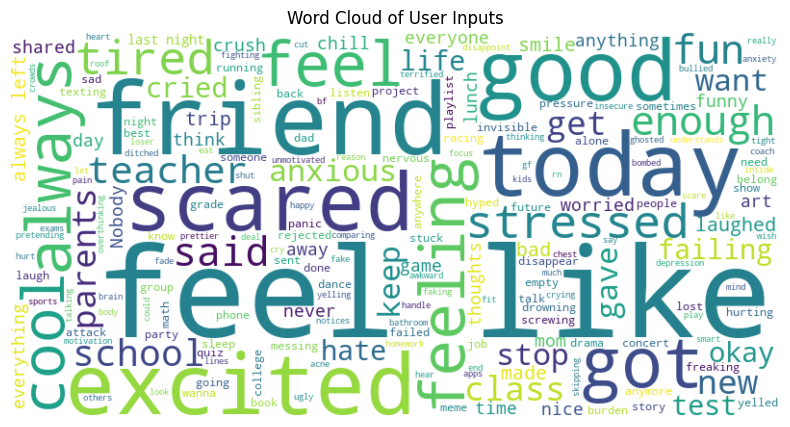

In [152]:
# Word Cloud for User Inputs
stop_words = set(stopwords.words('english'))
all_text = ' '.join(df['user_input'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of User Inputs')
plt.show()
